In [104]:
import torch
import torchvision.transforms as transforms
import torchvision
import math
import matplotlib.pyplot as plt

In [20]:
tfms = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

In [87]:
ds_train = torchvision.datasets.FashionMNIST('../../data', transform=tfms, train=True, download=True)
ds_test = torchvision.datasets.FashionMNIST('../../data', transform=tfms, train=False, download=True)

In [75]:
# print(dir(train_ds.targets))

In [88]:
ds_train.targets.bincount()

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [109]:
dl_train = torch.utils.data.DataLoader(ds_train, shuffle=True, batch_size=64)

In [110]:
dataiter = iter(dl_train)

In [111]:
images, labels = next(dataiter)

In [112]:
images[0].shape, labels[0]

(torch.Size([1, 28, 28]), tensor(0))

In [113]:
grid = torchvision.utils.make_grid(images, nrow=12)

In [114]:
import numpy as np

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


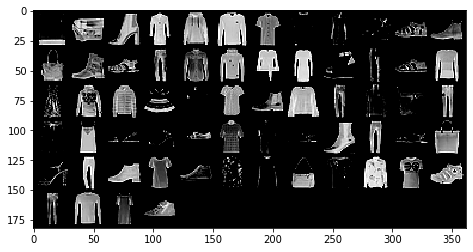

In [115]:
plt.figure(figsize=(15,4))
plt.imshow(grid.permute(1,2,0))

In [116]:
np.transpose(grid, (1,2,0)).size()

torch.Size([182, 362, 3])

In [121]:
def show(dl:torch.utils.data.DataLoader, 
         n: int
        ):
    images, labels = next(iter(dl))
    nrows = math.ceil(math.sqrt(n))
    fig, ax = plt.subplots(nrows=nrows, ncols=nrows, figsize=(10,10))

    images, labels = next(iter(dl))
    imshape = images.shape[-2:]

    for i, row in enumerate(ax):
        for j, col in enumerate(row):
            item_no = i * nrows + j
            img = images[item_no].view(imshape)
            col.imshow(img)
            col.set_title(str(labels[item_no]))
            col.axes.get_xaxis().set_visible(False)
            col.axes.get_yaxis().set_visible(False)

    plt.show()        

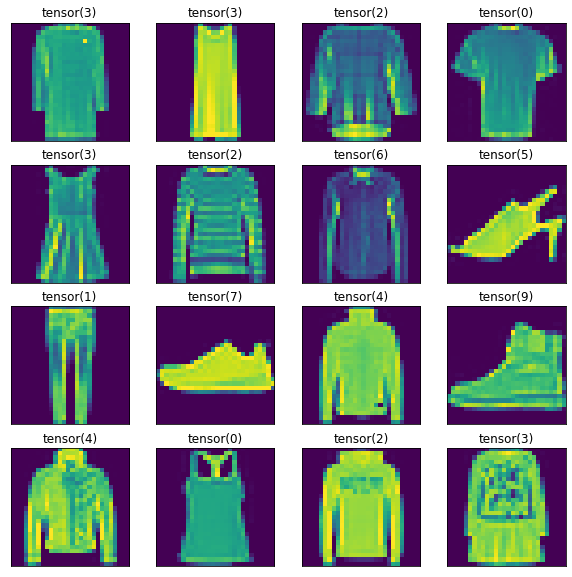

In [122]:
show(dl_train,n=16)